In [100]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from glob import glob
import pathlib
import common

FONT_SIZE = 15
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [151]:
data_prefix = '/data/zhenyus/webcachesim/ats_log'
sleep_time = 15.
max_log2_client = 8
n_client = 256
size = '128G'
# algs = ['fifo', 'lru', 'static']
algs = ['fifo', 'gbdt']
unit = 'm' 
means = [0, 300]
gbdt_version = '_fix_mem'

In [153]:
res = []
for mean in means:
    for alg in algs:
        if alg == 'gbdt' and mean == 0:
            df = pd.read_csv(f'{data_prefix}/throughput_{unit}_{alg}_{size}_{mean}{gbdt_version}.log', names=['n', 'byte', 't'], delimiter=' ')
        else:
            df = pd.read_csv(f'{data_prefix}/throughput_{unit}_{alg}_{size}_{mean}.log', names=['n', 'byte', 't'], delimiter=' ')
        df = df.loc[10:len(df)-10]
        df['alg'] = alg
        df['mean'] = mean
        res.append(df)
df = pd.concat(res)

In [154]:
df.groupby(['alg', 'mean']).agg({'byte': 'mean'})/1024**3*8

byte
alg  mean          
fifo 0     9.096564
     300   0.669973
gbdt 0     9.051618
     300   0.666522

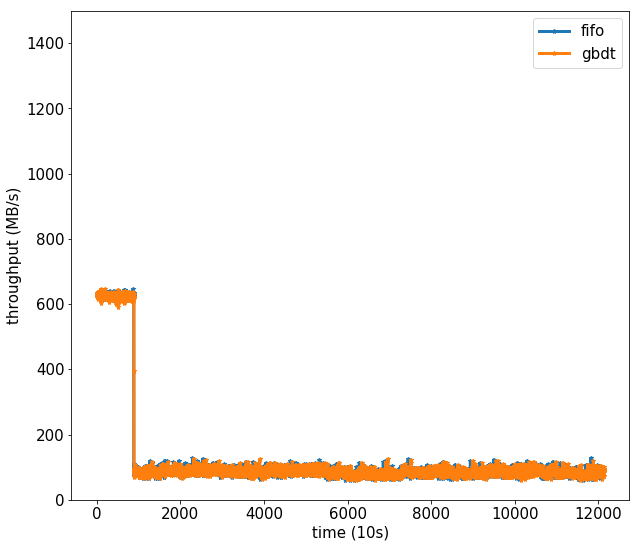

In [155]:
fig, ax = plt.subplots(figsize=(10, 9))
for l, grp in df.groupby('alg'):
    ax.plot(
        grp.groupby(lambda x: x//10).agg({'byte': 'mean'})/(2**20),
    #     '*',
        marker='*', 
        label=l,
    #     linestyle=None,
        markersize=5,
    )
plt.ylim([0, 1500])
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
plt.xlabel(f'time (10s)')
plt.ylabel('throughput (MB/s)')
plt.legend()
# plt.legend(ncol=2, 
#            fontsize='small',
#            columnspacing=0.5,
#            labelspacing=0.1,
#           handletextpad=0.3)
# plt.title(f'Latency - Throughput')
plt.show()